In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [4]:
#¿Cuál es la frecuencia relativa y acumulada del puntaje de alumnos?
#¿Cuál es el resultado de las estadisticas de centralidad del puntaje de alumnos?
#¿Cuál es el resultado de las estadisticas de dispersión del puntaje de alumnos?

ruta = 'C:/Users/Cristian Mendieta/OneDrive/Escritorio/Data Science/Estadistica/Practica_EDA_Kahoot.xlsx'

df = pd.read_excel(ruta)

In [5]:
df

,Question Number,Question,Answer 1,Answer 2,Answer 3,Answer 4,Answer 5,Answer 6,Correct Answers,Time Allotted to Answer (seconds),Player,Answer,Correct / Incorrect,Correct,Incorrect,Score (points),Score without Answer Streak Bonus (points),Current Total Score (points),Answer Time (%),Answer Time (seconds)
0,1 Quiz,¿Cuál NO es un estadístico de Centralidad?,Media,Varianza,Moda,Mediana,NaN,NaN,Varianza,60,Agustina,Varianza,Correct,1,0,891,891,891,21.83%,13.101
1,1 Quiz,¿Cuál NO es un estadístico de Centralidad?,Media,Varianza,Moda,Mediana,NaN,NaN,Varianza,60,Alejo,Varianza,Correct,1,0,932,932,932,13.67%,8.200
2,1 Quiz,¿Cuál NO es un estadístico de Centralidad?,Media,Varianza,Moda,Mediana,NaN,NaN,Varianza,60,Alozano,Varianza,Correct,1,0,961,961,961,7.84%,4.701
3,1 Quiz,¿Cuál NO es un estadístico de Centralidad?,Media,Varianza,Moda,Mediana,NaN,NaN,Varianza,60,AntonioP,Varianza,Correct,1,0,973,973,973,5.34%,3.201
4,1 Quiz,¿Cuál NO es un estadístico de Centralidad?,Media,Varianza,Moda,Mediana,NaN,NaN,Varianza,60,Cristian,Varianza,Correct,1,0,908,908,908,18.33%,11.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,21 Quiz,Se representa la función de masa que asigna pr...,Tiene uno de los números del 1 al 6 una vez,Tiene cada número par del 1 al 6 dos veces,Tiene cada número impar del 1 al 6 dos veces,Tiene el número 3 tres veces y los números de ...,NaN,NaN,Tiene el número 3 tres veces y los números de ...,180,PM,Tiene el número 3 tres veces y los números de ...,Correct,1,0,969,969,15828,6.22%,11.201
416,21 Quiz,Se representa la función de masa que asigna pr...,Tiene uno de los números del 1 al 6 una vez,Tiene cada número par del 1 al 6 dos veces,Tiene cada número impar del 1 al 6 dos veces,Tiene el número 3 tres veces y los números de ...,NaN,NaN,Tiene el número 3 tres veces y los números de ...,180,Pablo,Tiene el número 3 tres veces y los números de ...,Correct,1,0,979,979,17876,4.22%,7.601
417,21 Quiz,Se representa la función de masa que asigna pr...,Tiene uno de los números del 1 al 6 una vez,Tiene cada número par del 1 al 6 dos veces,Tiene cada número impar del 1 al 6 dos veces,Tiene el número 3 tres veces y los números de ...,NaN,NaN,Tiene el número 3 tres veces y los números de ...,180,Roberto,Tiene el número 3 tres veces y los números de ...,Correct,1,0,947,947,15837,10.56%,19.005
418,21 Quiz,Se representa la función de masa que asigna pr...,Tiene uno de los números del 1 al 6 una vez,Tiene cada número par del 1 al 6 dos veces,Tiene cada número impar del 1 al 6 dos veces,Tiene el número 3 tres veces y los números de ...,NaN,NaN,Tiene el número 3 tres veces y los números de ...,180,SH,Tiene el número 3 tres veces y los números de ...,Correct,1,0,932,932,12570,13.61%,24.501


In [75]:
# A partir de la columna Score (points), quiero saber cuál es la frecuencia relativa y acumulada de los puntajes obtenidos de los alumnos

df_freq=df.groupby('Score (points)').agg(Freq=('Score (points)', 'count')).reset_index()

df_freq['Freq_R']=100*df_freq['Freq']/df_freq['Freq'].sum()

df_freq['Freq_Acum']=df_freq['Freq'].cumsum()

df_freq

,Score (points),Freq,Freq_R,Freq_Acum
0,0,86,20.476190,86
1,517,1,0.238095,87
2,614,1,0.238095,88
3,653,1,0.238095,89
4,663,1,0.238095,90
...,...,...,...,...
128,990,2,0.476190,416
129,991,1,0.238095,417
130,992,1,0.238095,418
131,993,1,0.238095,419


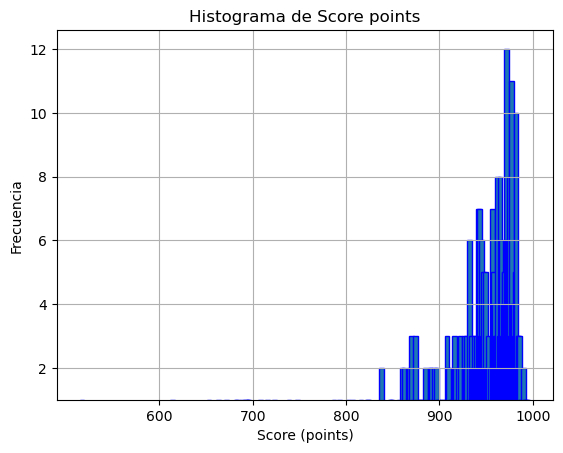

In [77]:
#Histograma

plt.bar(df_freq['Score (points)'][1:], df_freq['Freq'][1:], width=5, edgecolor='blue')

plt.xlabel('Score (points)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Score points')

plt.xticks(np.arange(600, df_freq['Score (points)'].max() + 50, 100))


plt.ylim(bottom=1)

plt.grid(True)
plt.show()

In [78]:
#Estadisticas de centralidad

media=df['Score (points)'].mean()
mediana=df['Score (points)'].median()
moda=df['Score (points)'].mode()

print(f'Media: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')

Media: 739.6214285714286
Mediana: 941.5
Moda: 0    0
Name: Score (points), dtype: int64


In [79]:
#Estadisticas de dispersión

var=df['Score (points)'].var()
std=df['Score (points)'].std()
rg_bajo=df['Score (points)'].min()
rg_alto=df['Score (points)'].max()

print(f'Varianza: {var}')
print(f'Desviación estándar: {std}')
print(f'Rango: {rg_bajo} - {rg_alto}')

Varianza: 145164.08784520952
Desviación estándar: 381.0040522687515
Rango: 0 - 995


In [80]:
df['Score (points)'].describe()

count    420.000000
mean     739.621429
std      381.004052
min        0.000000
25%      799.750000
50%      941.500000
75%      969.000000
max      995.000000
Name: Score (points), dtype: float64

In [81]:
C25=df['Score (points)'].quantile(0.25)
C50=df['Score (points)'].quantile(0.5)
C75=df['Score (points)'].quantile(0.75)
D10=df['Score (points)'].quantile(0.1)
D20=df['Score (points)'].quantile(0.2)
D80=df['Score (points)'].quantile(0.8)

print(f'Cuartil 25%: {C25}')
print(f'Cuartil 50%: {C50}')
print(f'Cuartil 75%: {C75}')
print(f'Decil 10%: {D10}')
print(f'Decil 20%: {D20}')
print(f'Decil 80%: {D80}')

Cuartil 25%: 799.75
Cuartil 50%: 941.5
Cuartil 75%: 969.0
Decil 10%: 0.0
Decil 20%: 0.0
Decil 80%: 972.0


In [82]:
#Rango intercuartilico

IQR=df['Score (points)'].quantile(0.75)-df['Score (points)'].quantile(0.25)
print(f'IQR: {IQR} ')

IQR: 169.25 


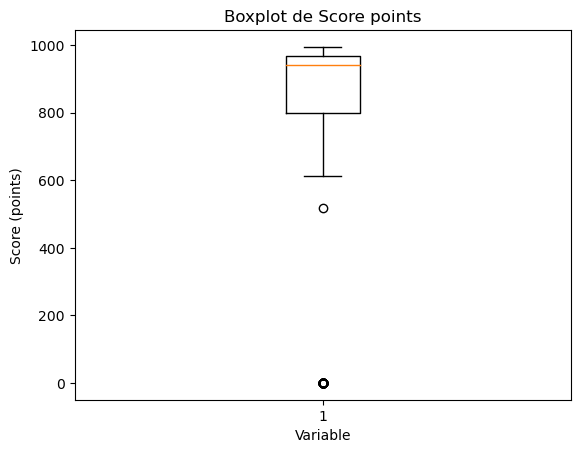

In [84]:
#Distribución de cajas

plt.boxplot(df['Score (points)'])

plt.xlabel('Variable')
plt.ylabel('Score (points)')
plt.title('Boxplot de Score points')

plt.show()